In [1]:
import numpy as np
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Convolution2D, Dropout, MaxPool2D, Flatten
from keras.activations import relu, softmax
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard,ModelCheckpoint
import tensorboard

from scipy import misc
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import time
import random

Using TensorFlow backend.


In [8]:
train = True
save = train
load = !train

In [9]:
numberClasses = 5
batchSize = 512
targetSize = 64
dropOut = 0.5

model = Sequential()
model.add(Convolution2D(filters = 64, kernel_size= (3,3), input_shape= (targetSize,targetSize,3),activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Convolution2D(filters =64, kernel_size= (3,3),activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Convolution2D(filters =64, kernel_size= (3,3),activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Convolution2D(filters =64, kernel_size= (3,3),activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dropout(dropOut))

model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(dropOut))

model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(dropOut))

model.add(Dense(units = 5, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)          36928     
__________

In [10]:
if train:
    train_datagen = ImageDataGenerator(
            rescale=1./255,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip= True)

    test_datagen = ImageDataGenerator(
            rescale=1./255)

    training_set = train_datagen.flow_from_directory(
        'dataset/training_set',
        target_size=(targetSize, targetSize),
        batch_size=batchSize,
        class_mode='categorical')

    test_set = test_datagen.flow_from_directory(
        'dataset/test_set',
        target_size=(targetSize, targetSize),
        batch_size=batchSize,
        class_mode='categorical')
    filepath='./tmp/weights.hdf5'
    checkpointer = ModelCheckpoint(filepath=filepath, verbose=1,
                                   save_best_only=True, monitor='val_loss',
                                   mode='auto', period=1)
    tensorboard = TensorBoard(log_dir='./logs', histogram_freq=0,batch_size = batchSize, write_grads=True, write_images=True)

    model.fit_generator(
        training_set,
        max_queue_size=10,
        workers = 10,
        steps_per_epoch=8000/batchSize,
        epochs=100,
        validation_data=test_set,
        validation_steps=2000/batchSize,callbacks=[tensorboard,checkpointer] )

Found 288 images belonging to 5 classes.
Found 91 images belonging to 5 classes.
Epoch 1/100
16/15 [==============================] - 9s 582ms/step - loss: 1.5540 - acc: 0.2682 - val_loss: 1.5015 - val_acc: 0.3187
Epoch 2/100
16/15 [==============================] - 7s 428ms/step - loss: 1.5121 - acc: 0.2886 - val_loss: 1.4918 - val_acc: 0.3187
Epoch 3/100
16/15 [==============================] - 7s 445ms/step - loss: 1.5045 - acc: 0.2945 - val_loss: 1.4868 - val_acc: 0.3187
Epoch 4/100
16/15 [==============================] - 7s 430ms/step - loss: 1.4927 - acc: 0.3006 - val_loss: 1.4819 - val_acc: 0.3187
Epoch 5/100
16/15 [==============================] - 7s 456ms/step - loss: 1.4823 - acc: 0.2888 - val_loss: 1.4686 - val_acc: 0.3187
Epoch 6/100
16/15 [==============================] - 7s 450ms/step - loss: 1.4750 - acc: 0.2982 - val_loss: 1.4662 - val_acc: 0.3187
Epoch 7/100
16/15 [==============================] - 8s 475ms/step - loss: 1.4714 - acc: 0.2845 - val_loss: 1.4404 - val_

Epoch 30/100
16/15 [==============================] - 7s 431ms/step - loss: 0.5445 - acc: 0.8114 - val_loss: 0.3778 - val_acc: 0.9121
Epoch 31/100
16/15 [==============================] - 7s 427ms/step - loss: 0.3966 - acc: 0.8657 - val_loss: 0.3378 - val_acc: 0.9121
Epoch 32/100
16/15 [==============================] - 7s 428ms/step - loss: 0.3632 - acc: 0.8739 - val_loss: 0.4143 - val_acc: 0.8681
Epoch 33/100
16/15 [==============================] - 7s 425ms/step - loss: 0.3316 - acc: 0.8815 - val_loss: 0.3392 - val_acc: 0.9011
Epoch 34/100
16/15 [==============================] - 7s 443ms/step - loss: 0.5305 - acc: 0.8140 - val_loss: 0.4268 - val_acc: 0.9011
Epoch 35/100
16/15 [==============================] - 7s 419ms/step - loss: 0.4716 - acc: 0.8368 - val_loss: 0.4287 - val_acc: 0.8681
Epoch 36/100
16/15 [==============================] - 7s 448ms/step - loss: 0.3670 - acc: 0.8739 - val_loss: 0.3416 - val_acc: 0.9011
Epoch 37/100
16/15 [==============================] - 7s 427ms

16/15 [==============================] - 7s 437ms/step - loss: 0.1555 - acc: 0.9427 - val_loss: 0.3735 - val_acc: 0.9341
Epoch 62/100
16/15 [==============================] - 7s 425ms/step - loss: 0.1712 - acc: 0.9349 - val_loss: 0.2881 - val_acc: 0.9231
Epoch 63/100
16/15 [==============================] - 7s 425ms/step - loss: 0.1543 - acc: 0.9390 - val_loss: 0.3266 - val_acc: 0.9341
Epoch 64/100
16/15 [==============================] - 7s 443ms/step - loss: 0.1505 - acc: 0.9403 - val_loss: 0.3117 - val_acc: 0.9341
Epoch 65/100
16/15 [==============================] - 7s 437ms/step - loss: 0.1354 - acc: 0.9481 - val_loss: 0.3110 - val_acc: 0.9341
Epoch 66/100
16/15 [==============================] - 7s 412ms/step - loss: 0.1438 - acc: 0.9460 - val_loss: 0.4505 - val_acc: 0.8901
Epoch 67/100
16/15 [==============================] - 7s 438ms/step - loss: 0.2647 - acc: 0.9110 - val_loss: 0.3570 - val_acc: 0.9121
Epoch 68/100
16/15 [==============================] - 7s 417ms/step - loss:

Epoch 94/100
16/15 [==============================] - 7s 444ms/step - loss: 0.1429 - acc: 0.9514 - val_loss: 0.3824 - val_acc: 0.9121
Epoch 95/100
16/15 [==============================] - 7s 436ms/step - loss: 0.1212 - acc: 0.9605 - val_loss: 0.3361 - val_acc: 0.9011
Epoch 96/100
16/15 [==============================] - 7s 430ms/step - loss: 0.1210 - acc: 0.9564 - val_loss: 0.3216 - val_acc: 0.9231
Epoch 97/100
16/15 [==============================] - 7s 425ms/step - loss: 0.1612 - acc: 0.9466 - val_loss: 0.3100 - val_acc: 0.9011
Epoch 98/100
16/15 [==============================] - 7s 426ms/step - loss: 0.1164 - acc: 0.9601 - val_loss: 0.3189 - val_acc: 0.9341
Epoch 99/100
16/15 [==============================] - 7s 424ms/step - loss: 0.1112 - acc: 0.9612 - val_loss: 0.3005 - val_acc: 0.9341
Epoch 100/100
16/15 [==============================] - 7s 439ms/step - loss: 0.1028 - acc: 0.9653 - val_loss: 0.2072 - val_acc: 0.9231


In [11]:
if save:
    model = load_model('./tmp/final5classModel.hdf5')
    model.save("./models/{}".format(time.time()))

### Result
Epoch 100/100
16/15 [==============================] - 5s 340ms/step - loss: 0.4006 - acc: 0.8542 - val_loss: 0.3889 - val_acc: 0.8901

Epoch 00100: val_loss improved from 0.40247 to 0.38893, saving model to ./tmp/weights.hdf5

## Loading model and testin

In [6]:
if load:
    model = load_model("./models/final5classModel.hdf5")

In [7]:
#model = load_model('./tmp/weights.hdf5')

TypeError: Unexpected keyword argument passed to optimizer: amsgrad

## Test

In [12]:
def readImages(path,imgRows, imgCols,channels):
    newPath = path # [folder for folder in listdir(path) if not isfile(join(path,folder))]
    
    allImages = []

    images = [f for f in listdir(newPath) if (isfile(join(newPath, f)) and (f[-4:]==".jpg" or f[-4:]==".png"))]

    for img in images:
        tmpPath = join(newPath, img)
        if channels == 1:
            img = misc.imread(tmpPath,'F')
        else: 
            img = misc.imread(tmpPath)
        img = misc.imresize(img, (imgRows,imgCols))
        img = img.astype(np.float32)
        img /= 255.
        img = np.reshape(img, (imgRows, imgCols,channels))
        allImages.append(img)
    return np.array(allImages)

test = readImages("./dataset/test",64,64,3)

In [13]:
xTest = test

## Classifying

In [14]:
%%time
for i in range(10):
    data = model.predict_classes(xTest,batch_size = 32)

Wall time: 324 ms


In [15]:
print(data)
print (len(data))

[0 0 0 0 0 2 0 1 0 0 2 1 2 1 1 2 1 1 3 1 1 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2
 1 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 1
 2 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4]
113


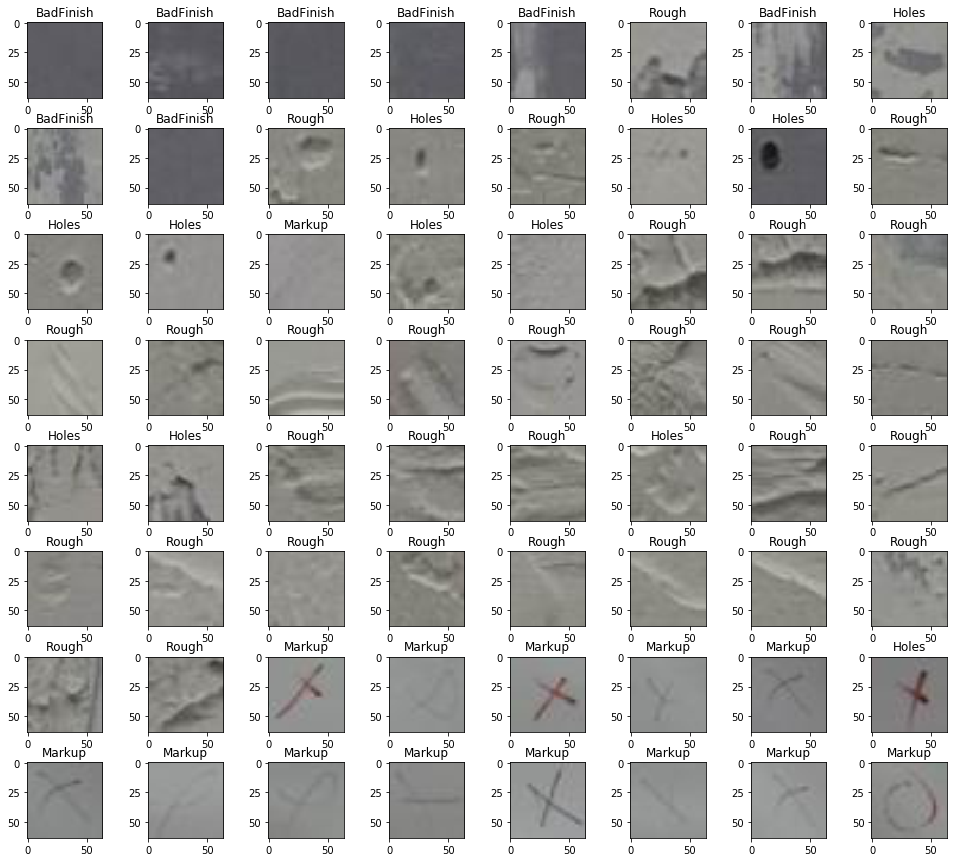

In [16]:
size = 8
sizeV =8
labels = ["BadFinish","Holes","Rough","Markup","Pass"]
f, axarr = plt.subplots(size, sizeV, figsize=(15,15))
for i in range(size):
    for j in range (sizeV):
        index = i*sizeV+j
        axarr[i,j].imshow((test[index]))
        label = labels[data[index]]

        axarr[i,j].set_title(label)
    

f.subplots_adjust(left=None, bottom=None, right=1, top=None,
                wspace=.2, hspace=.4)
plt.show()

In [18]:
images = [f for f in listdir("./dataset/test") if (isfile(join("./dataset/test", f)) and (f[-4:]==".jpg" or f[-4:]==".png"))]

labels = [int (name[0]) for name in images]
print (labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


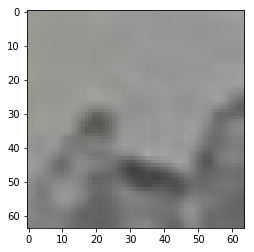

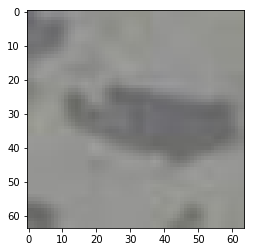

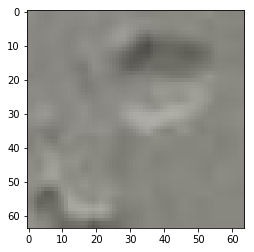

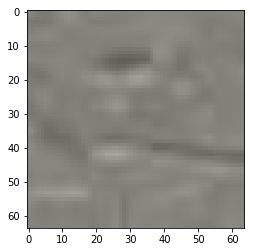

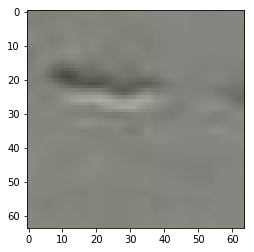

In [19]:
counter = 0
size = 4
sizeV = 4
for i in range(size):
    for j in range (sizeV):
        index = i*sizeV+j
        if labels[index] != data[index]:
            counter += 1
            plt.imshow((test[index]))
            plt.show()
            label =  ("{}> Real: {} | Output: {}".format (i,labels[index],data[index]))
            axarr[i,j].imshow((test[index]))
            axarr[i,j].set_title(label)
            
f.subplots_adjust(left=None, bottom=None, right=1, top=None,
                wspace=.2, hspace=.4)
plt.show()
        
# for i in range (len (labels)):
#     if labels[i] != data[i]:
#         counter += 1
#         plt.imshow((test[i]))
#         plt.show()
#         print ("{}> Real: {} | Output: {}".format (i,labels[i],data[i]))

In [20]:
print (counter, 1-  counter/len(labels))       

5 0.9557522123893806


In [ ]:
size = 6
sizeV =5
labels = ["BadFinish","Holes","Rough","Markup","Pass"]
indexList = list(range(len(data)))
random.shuffle(indexList)
indexList = indexList[:30]
print ((indexList))
test_ = [test[i] for i in indexList]
data_ = [data[i] for i in indexList]

f, axarr = plt.subplots(size, sizeV, figsize=(15,15))
for i in range(size):
    for j in range (sizeV):
        index = random.randint(0,len(data)-1)#i*sizeV+j
        #index = indexList[index_]
        axarr[i,j].imshow((test[index]))
        label = str(index)+ "|" +str(labels[data[index]])
        axarr[i,j].set_title(label)
    

f.subplots_adjust(left=None, bottom=None, right=1, top=None,
                wspace=.2, hspace=.4)
plt.show()